In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../../Dataset/Platinum.csv")

In [3]:
df.head()

,Date,Open,Close,High,Low
0,2018-01-01,933.5,930.5,933.5,930.5
1,2018-01-02,931.0,945.5,946.5,931.0
2,2018-01-03,945.0,957.0,961.0,940.5
3,2018-01-04,955.0,964.0,966.5,945.0
4,2018-01-05,963.0,969.5,970.5,959.5


In [4]:
df = df[["Close"]]
df.reset_index(drop=True)
df.isnull().sum()

Close    0
dtype: int64

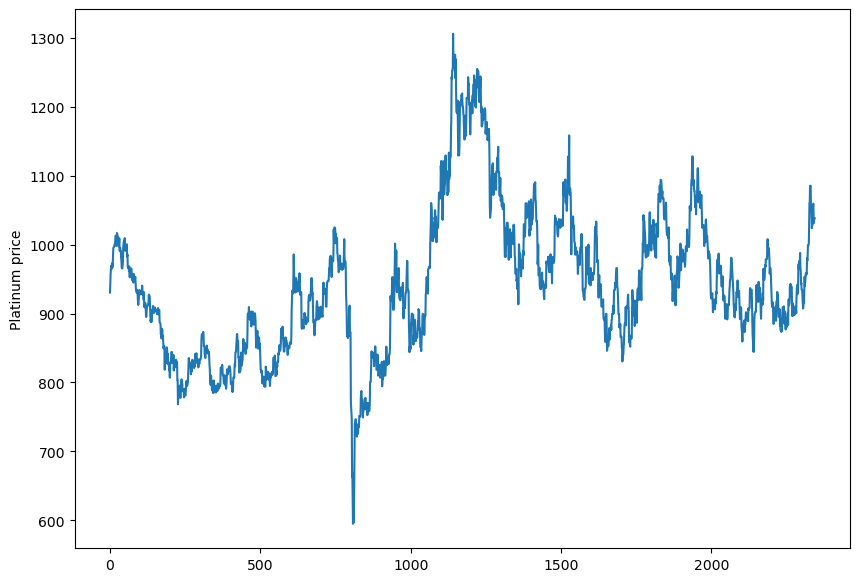

In [5]:
df.Close.plot(figsize = (10, 7))
plt.ylabel("Platinum price")
plt.show()


In [6]:
t = .6
t = int(t * len(df))

data_train = df[:t]
data_test = df[t:]

In [7]:
# Chia các tập x,y train, test tương ứng
X_train = np.array(data_train.index).reshape(-1, 1)  #Lấy chỉ mục Index
y_train = np.array(data_train['Close']) #Lấy dữ liệu giá Close

X_test = np.array(data_test.index).reshape(-1, 1)  #Lấy chỉ mục Index
y_test = np.array(data_test['Close']) #Lấy dữ liệu giá Close

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
#Tạo mô hình hồi quy tuyến tính y = m*X1 + c
linear = LinearRegression().fit(X_train, y_train)
print("m1: " , linear.coef_[0])
print("c: " , linear.intercept_)

m1:  0.16701630490058633
c:  811.2797940292442


In [10]:
predicted_price = linear.predict(X_test)
predicted = pd.DataFrame(predicted_price, columns = ['Close'])
predicted

,Close
0,1046.104719
1,1046.271735
2,1046.438751
3,1046.605768
4,1046.772784
...,...
933,1201.930931
934,1202.097947
935,1202.264964
936,1202.431980


In [11]:
mape = np.mean(np.abs(predicted_price - y_test)/np.abs(y_test)) *100
mse = np.mean(np.square(y_test - predicted_price))
rmse = np.sqrt(mse)

print("Mean Absolute Percentage Error (MAPE):", mape)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Percentage Error (MAPE): 17.49484835594629
Mean Squared Error (MSE): 33390.72023717727
Root Mean Squared Error (RMSE): 182.73127875976044


In [12]:
dt_train = np.append(data_train, predicted['Close'][0]) 

In [13]:
# Quá trình tạo index predict 90 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = linear.predict(x_next_90_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
[1202.76601272 1202.93302902 1203.10004533 1203.26706163 1203.43407794
 1203.60109424 1203.76811055 1203.93512685 1204.10214316 1204.26915946
 1204.43617577 1204.60319207 1204.77020838 1204.93722468 1205.10424098
 1205.27125729 1205.43827359 1205.6052899  1205.7723062  1205.93932251
 1206.10633881 1206.27335512 1206.44037142 1206.60738773 1206.77440403
 1206.94142034 1207.10843664 1207.27545295 1207.44246925 1207.60948556
 1207.77650186 1207.94351817 1208.11053447 1208.27755078 1208.44456708
 1208.61158339 1208.77859969 1208.945616   1209.1126323  1209.27964861
 1209.44666491 1209.61368122 1209.78069752 1209.94771383 1210.11473013
 1210.28174644 1210.44876274 1210.61577905 1210.78279535 1210.94981166
 1211.11682796 1211.28384427 1211.45086057 1211.61787688 1211.78489318
 1211.95190949 1212.11892579 1212.2859421  1212.4529584  1212.61997471
 1212.78699101 1212.95400732 1213.12102362 1213.28803992 1213.45505623
 1213.62207253 1213.78908884 1

In [14]:
plt.rcParams['figure.figsize'] = [18, 10]

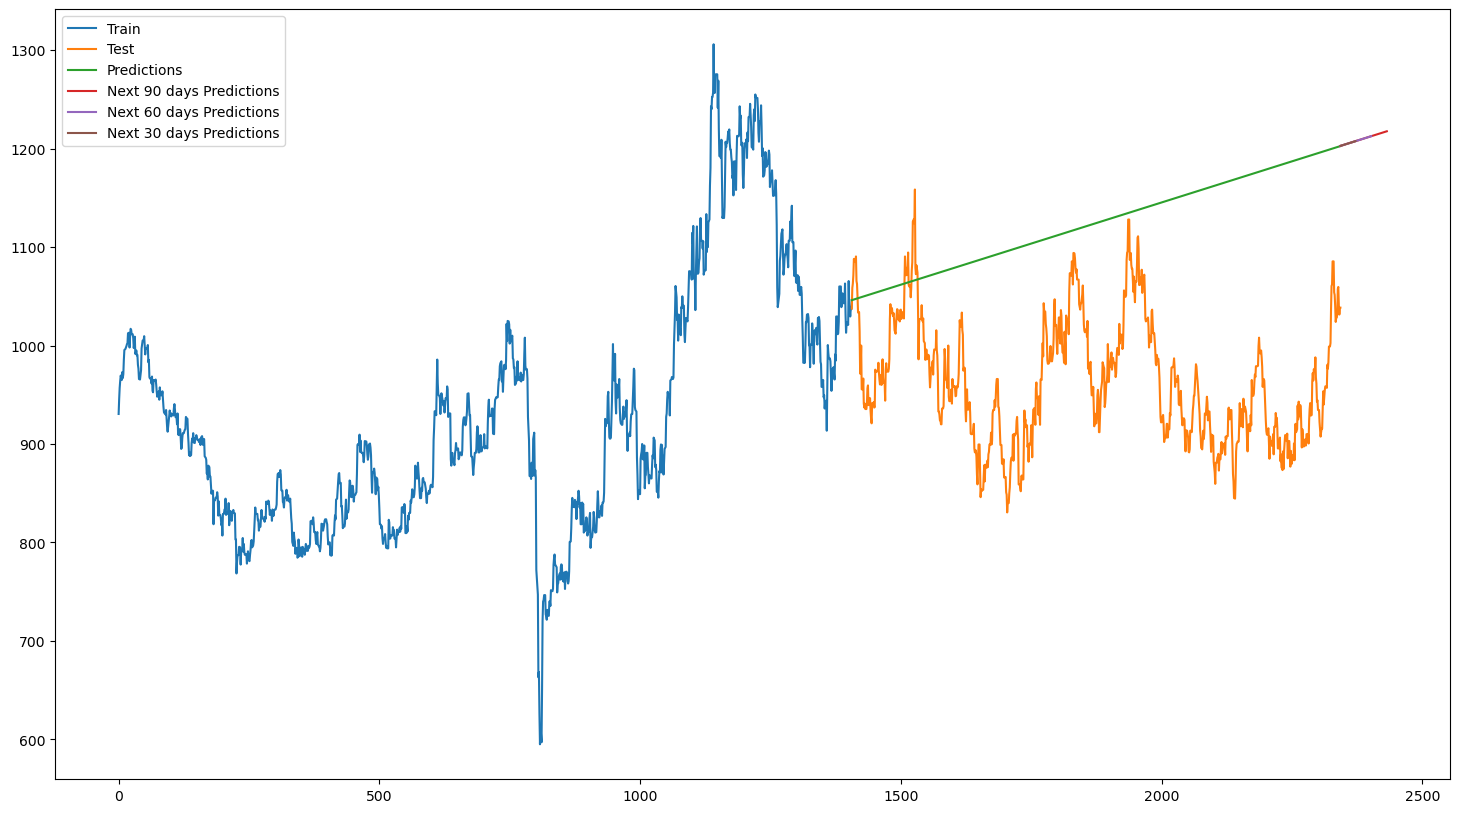

In [15]:
plt.plot(pd.RangeIndex(start=0, stop=len(dt_train), step=1), dt_train)
plt.plot(data_test.index, data_test['Close'])
plt.plot(data_test.index, predicted['Close'])
plt.plot(last_data,y_next_90_days)
plt.plot(pd.RangeIndex(start=last_index, stop=last_index+60, step=1),y_next_90_days[0:60])
plt.plot(pd.RangeIndex(start=last_index, stop=last_index+30, step=1),y_next_90_days[0:30])
plt.legend(['Train', 'Test', 'Predictions', 'Next 90 days Predictions', 'Next 60 days Predictions', 'Next 30 days Predictions'])
plt.show()